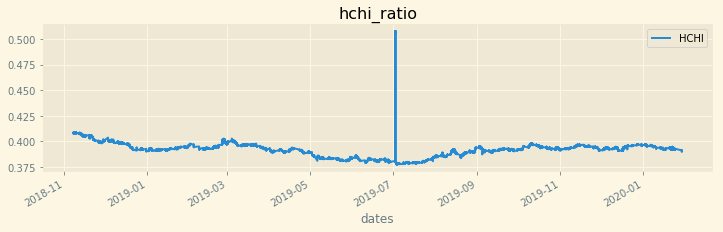

In [89]:
# import requests
import pandas as pd
# import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('Solarize_Light2')

df = pd.read_excel('../dataset/hchi_ratio.xlsx').set_index(['dates']).loc[:, 'HCHI':]
# df.head()

# r = requests.get('https://datamarket.com/api/v1/list.json?ds=22ox')
# jobj = json.loads(r.text[18:-1])
# data = jobj[0]['data']
# df = pd.DataFrame(data, columns=['time','data']).set_index('time')
train = df.loc['2018-12-1':'2019-12-31']
test = df.loc['2020-1-1':'2020-1-31']
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)
pred = test.copy()
df.plot(figsize=(12,3));
plt.title('hchi_ratio');

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, freq=924*22)

                            OLS Regression Results                            
Dep. Variable:                   HCHI   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2904.
Date:                Mon, 24 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:44:13   Log-Likelihood:             9.1410e+05
No. Observations:              236533   AIC:                        -1.828e+06
Df Residuals:                  236531   BIC:                        -1.828e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3922   2.09e-05   1.88e+04      0.0

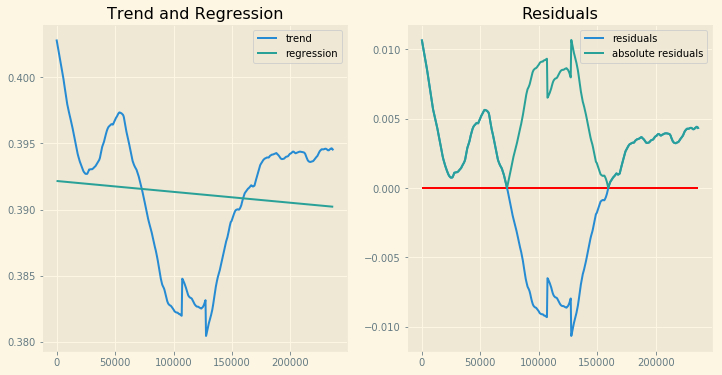

In [102]:
import numpy as np
import statsmodels.api as sm
from statsmodels.api import OLS

x, y = np.arange(len(decomposition.trend.dropna())), decomposition.trend.dropna()
x = sm.add_constant(x)
model = OLS(y, x)
res = model.fit()
print(res.summary())
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(decomposition.trend.dropna().values, label='trend')
ax[0].plot([res.params.x1*i + res.params.const for i in np.arange(len(decomposition.trend.dropna()))], label='regression')
ax[1].plot(res.resid.values, label='residuals')
ax[1].plot(np.abs(res.resid.values), label='absolute residuals')
ax[1].hlines(0, 0, len(res.resid), color='r')
ax[0].set_title("Trend and Regression")
ax[1].set_title("Residuals")
ax[0].legend()
ax[1].legend()

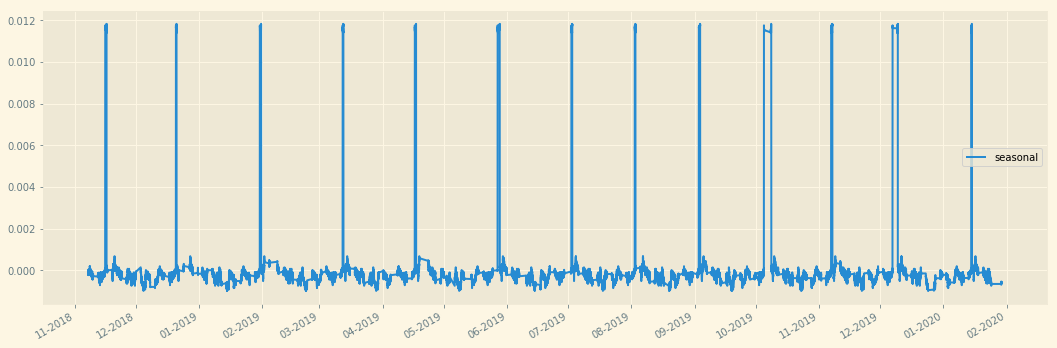

In [119]:
from matplotlib.dates import MonthLocator
from matplotlib.dates import DateFormatter

plt.figure(figsize=(18,6))
plt.plot(df.index, decomposition.seasonal.values, label='seasonal')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator()) 
plt.gca().xaxis.set_major_formatter(DateFormatter("%m-%Y"))
plt.gcf().autofmt_xdate()

In [90]:
def plot_rolling(df):
    df_copy = pd.DataFrame(index=df.index)
    df_copy['z_data'] = (df['HCHI'] - df['HCHI'].rolling(window='30D').mean()) / df['HCHI'].rolling(window='30D').std()
    df_copy['zp_data'] = df_copy['z_data'] - df_copy['z_data'].shift(27720)
    fig, ax = plt.subplots(3,figsize=(12, 30))
    ax[0].plot(df.index, df.HCHI, label='raw data')
    ax[0].plot(df.HCHI.rolling(window='30D').mean(), label="rolling mean");
    ax[0].plot(df.HCHI.rolling(window='30D').std(), label="rolling std (x10)");
    ax[0].legend()

    ax[1].plot(df.index, df_copy.z_data, label="de-trended data")
    ax[1].plot(df_copy.z_data.rolling(window='30D').mean(), label="rolling mean");
    ax[1].plot(df_copy.z_data.rolling(window='30D').std(), label="rolling std (x10)");
    ax[1].legend()

    ax[2].plot(df.index, df_copy.zp_data, label="12 lag differenced de-trended data")
    ax[2].plot(df_copy.zp_data.rolling(window='30D').mean(), label="rolling mean");
    ax[2].plot(df_copy.zp_data.rolling(window='30D').std(), label="rolling std (x10)");
    ax[2].legend()

    plt.tight_layout()
    fig.autofmt_xdate()

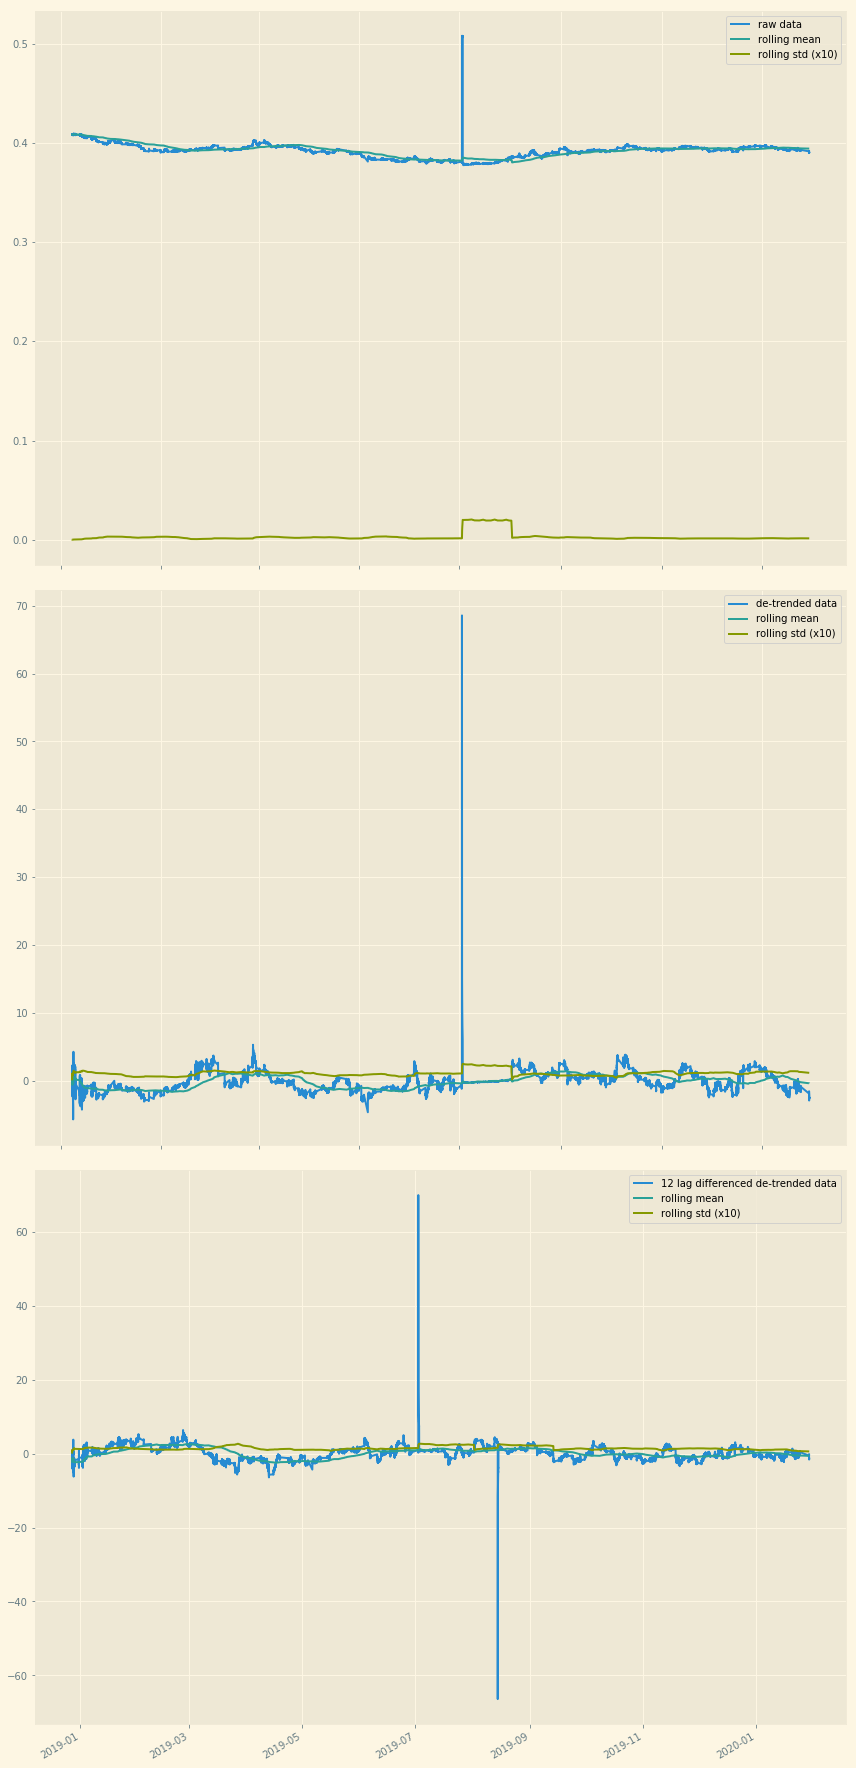

In [91]:
plot_rolling(df)

In [92]:
df.head

<bound method NDFrame.head of                          HCHI
dates                        
2018-11-07 17:15:00  0.407850
2018-11-07 17:16:00  0.408369
2018-11-07 17:17:00  0.408423
2018-11-07 17:18:00  0.408352
2018-11-07 17:19:00  0.408503
2018-11-07 17:20:00  0.408339
2018-11-07 17:21:00  0.408337
2018-11-07 17:22:00  0.408212
2018-11-07 17:23:00  0.408211
2018-11-07 17:24:00  0.408271
2018-11-07 17:25:00  0.408328
2018-11-07 17:26:00  0.408409
2018-11-07 17:27:00  0.408323
2018-11-07 17:28:00  0.408369
2018-11-07 17:29:00  0.408307
2018-11-07 17:30:00  0.408404
2018-11-07 17:31:00  0.408370
2018-11-07 17:32:00  0.408398
2018-11-07 17:33:00  0.408447
2018-11-07 17:34:00  0.408395
2018-11-07 17:35:00  0.408565
2018-11-07 17:36:00  0.408565
2018-11-07 17:37:00  0.408675
2018-11-07 17:38:00  0.408751
2018-11-07 17:39:00  0.408578
2018-11-07 17:40:00  0.408384
2018-11-07 17:41:00  0.408400
2018-11-07 17:42:00  0.408400
2018-11-07 17:43:00  0.408338
2018-11-07 17:44:00  0.408412
...       